Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()
enrollments = 'C:\\Users\\Chip\\.ipython\\enrollments.csv'

with open(enrollments, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
print (enrollments[0])    
print (len(enrollments))

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', '2014-11-10'), ('cancel_date', '2015-01-14'), ('days_to_cancel', '65'), ('is_udacity', 'True'), ('is_canceled', 'True')])
1640


In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

daily_engagement = 'C:\\Users\\Chip\\.ipython\\daily_engagement.csv'
project_submissions = 'C:\\Users\\Chip\\.ipython\\project_submissions.csv'

def print_first_row(file_name):
    with open(file_name, 'rb') as x:
        reader = unicodecsv.DictReader(x)
        return list(reader)

daily_engagement = print_first_row(daily_engagement)
project_submissions = print_first_row(project_submissions)
print (project_submissions[0])
print (len(project_submissions))

print (daily_engagement[0])
print (len(daily_engagement))

OrderedDict([('creation_date', '2015-01-14'), ('completion_date', '2015-01-16'), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])
3642
OrderedDict([('account_key', '0'), ('utc_date', '2015-1-9'), ('num_courses_visited', '1'), ('total_minutes_visited', '11.6793745'), ('lessons_completed', '0'), ('projects_completed', '0')])
136240


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
print(enrollments[0])

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

print (daily_engagement[0])    

OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0)])


In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print(project_submissions[0])

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def find_unique_students(data):
    num_unique_students = set()
    for row in data:
        num_unique_students.add(row['account_key'])
    return num_unique_students

unique_enrollments_students = find_unique_students(enrollments)
print (len(unique_enrollments_students))
print (unique_enrollments_students)

unique_engagement_students = find_unique_students(daily_engagement)
print (len(unique_engagement_students))

unique_submissions_students = find_unique_students(project_submissions)
print (len(unique_submissions_students))

1302
{'1048', '576', '224', '752', '969', '1217', '409', '375', '17', '1075', '580', '575', '461', '849', '388', '415', '637', '616', '1303', '551', '640', '541', '1162', '806', '158', '662', '100', '511', '906', '1148', '270', '458', '1267', '506', '755', '648', '1231', '345', '146', '212', '1182', '1142', '542', '1006', '968', '113', '703', '1235', '1238', '962', '364', '920', '681', '137', '952', '802', '1161', '47', '1245', '463', '490', '1087', '910', '49', '161', '795', '1186', '129', '712', '442', '693', '312', '533', '255', '263', '1131', '377', '878', '1067', '800', '579', '973', '96', '824', '1236', '155', '1110', '1083', '197', '667', '252', '206', '581', '139', '1037', '203', '757', '361', '1081', '230', '21', '131', '1119', '613', '548', '1078', '104', '126', '536', '219', '406', '1249', '370', '994', '81', '805', '525', '668', '186', '309', '1225', '568', '1042', '706', '1237', '119', '740', '293', '220', '280', '106', '484', '451', '949', '1254', '264', '540', '279', '12

## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    students = enrollment['account_key']
    if students  not in unique_engagement_students:
        print (enrollment)
        print (enrollments.index(enrollment))
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
65


In [9]:
## Checking for More Problem Records

In [10]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_problem_students = 0
for enrollment in enrollments:
    students = enrollment['account_key']
    if students  not in find_unique_students(daily_engagement) and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        
print (num_problem_students)             

3


## Tracking Down the Remaining Problems

In [11]:
# Create a set of the account keys for all Udacity test account
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
print(len(udacity_test_accounts))
print (udacity_test_accounts)

6
{'1101', '448', '818', '1069', '1304', '312'}


In [12]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [13]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [14]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key'] ## the keys
        enrollment_date = enrollment['join_date'] ## the values
        paid_students[account_key] = enrollment_date
print (len(paid_students))
print (paid_students)

999
{'448': datetime.datetime(2015, 1, 27, 0, 0), '429': datetime.datetime(2015, 3, 10, 0, 0), '60': datetime.datetime(2015, 4, 1, 0, 0), '369': datetime.datetime(2014, 11, 10, 0, 0), '322': datetime.datetime(2015, 3, 10, 0, 0), '336': datetime.datetime(2014, 11, 10, 0, 0), '553': datetime.datetime(2014, 11, 10, 0, 0), '584': datetime.datetime(2015, 3, 10, 0, 0), '458': datetime.datetime(2015, 4, 6, 0, 0), '1058': datetime.datetime(2015, 3, 10, 0, 0), '206': datetime.datetime(2014, 11, 10, 0, 0), '45': datetime.datetime(2015, 3, 10, 0, 0), '315': datetime.datetime(2014, 11, 10, 0, 0), '604': datetime.datetime(2014, 11, 10, 0, 0), '204': datetime.datetime(2014, 11, 10, 0, 0), '408': datetime.datetime(2015, 4, 1, 0, 0), '51': datetime.datetime(2015, 3, 10, 0, 0), '323': datetime.datetime(2014, 11, 10, 0, 0), '568': datetime.datetime(2014, 11, 10, 0, 0), '130': datetime.datetime(2015, 4, 1, 0, 0), '550': datetime.datetime(2015, 5, 28, 0, 0), '44': datetime.datetime(2015, 3, 10, 0, 0), '19

## Getting Data from First Week

In [15]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [16]:
# Remove any data points corresponding to students who cancel during their 
# free trials.

def remove_free_trial_cancel(data):
    new_data = []
    for data_points in data:
        if data_points['account_key'] in paid_students:
            new_data.append(data_points)
    return new_data

paid_enrollments = remove_free_trial_cancel(enrollments)
paid_daily_engagement = remove_free_trial_cancel(daily_engagement) 
paid_project_submissions = remove_free_trial_cancel(project_submissions)

print (len(paid_enrollments))
print(len(paid_daily_engagement))
print (len(paid_project_submissions))


1309
135128
3626


In [17]:
for engagement_record in paid_daily_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [18]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = []

for rowss in paid_daily_engagement:
    account_key = rowss['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = rowss['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(rowss)

print (len(paid_engagement_in_first_week))
print (paid_engagement_in_first_week[0])
print (paid_engagement_in_first_week[1])

6934
OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.28488733), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)])


## Exploring Student Engagement

In [19]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# Unecessary to add another parameter 'key_name', but it makes it more flexible.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
print (len(engagement_by_account))
print (engagement_by_account)

997
defaultdict(<class 'list'>, {'0': [OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)]), OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.28488733), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)]), OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.63374633), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)]), OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 33.48926967), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)]), OrderedDict([('account_key', '0'), ('utc_da

In [20]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
def sum_grp_data(data, field_name):
    sum_data = {}
    for key, data_points in data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        sum_data[key] = total
    return sum_data
total_minutes_by_account = sum_grp_data(engagement_by_account, 'total_minutes_visited')
print (total_minutes_by_account)  

{'0': 494.8804961, '1': 18.576384667, '2': 0.0, '3': 0.0, '4': 33.32140467, '5': 329.75785663, '6': 780.454551167, '7': 104.20388851, '8': 989.1136418, '9': 448.4713842, '10': 130.123478367, '11': 0.0, '12': 179.47190883, '13': 1013.3833969699999, '14': 65.6221875, '15': 983.3750404, '16': 119.1203005, '17': 235.49969153299998, '18': 155.1361575, '19': 0.0, '20': 447.9389778369999, '21': 931.1036912670002, '22': 657.2052334000001, '23': 1591.32281433, '24': 943.1881172000001, '25': 0.0, '26': 430.8016758, '27': 1579.1212266630002, '28': 766.2563157, '29': 556.19060333, '30': 69.65783517, '31': 247.27557963999996, '32': 123.29150483, '33': 253.98702583, '34': 180.413814, '35': 765.64021704, '36': 809.21389589, '37': 1378.1950917000001, '38': 0.0, '39': 1001.5888595, '40': 478.21952618999995, '41': 511.925391, '42': 174.30704300000002, '43': 88.822038, '44': 0.0, '45': 0.0, '46': 26.11893517, '47': 854.82888817, '48': 1055.6871896700002, '49': 0.0, '50': 491.90870783, '51': 0.0, '52': 3.

In [73]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def data_calculate(data):
    print ('Sum:', np.sum(list(data)))
    print ('Means:', np.mean(list(data)))
    print ('Standard Deviation:', np.std(list(data)))
    print ('Min:', np.min(list(data)))
    print('Max:', np.max(list(data)))
    plt.hist(list(data))

Sum: 303916.52213268203
Means: 304.83101517821666
Standard Deviation: 405.7147359845597
Min: 0.0
Max: 3564.7332645


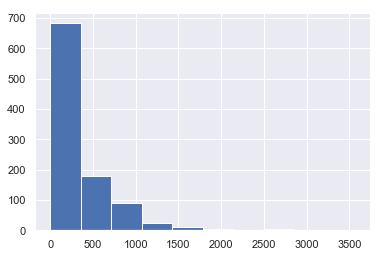

In [74]:
# Summarize the data about minutes spent in the classroom
## There is data_calculate(data) func below.
total_minutes = total_minutes_by_account.values()
(data_calculate(total_minutes))

## Debugging Data Analysis Code

In [59]:
## Check again to make sure the output for Max of total_minutes is correct.

# The 2 lines of codes right below are just for variable initialization,
# meaning to define a variable that you don't know what value to assign for that variable yet.
# This means they are not equal to the 2 values 'None' or '0'.
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student
print(max_minutes)   
print(student_with_max_minutes)

3564.7332645
163


In [60]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print (engagement_record)
        
## First try: There are way more data than it should be. 
## There are supposed to be only 7 data corresponding to 7 days as we're looking into the first week only.

## Second try: Students can enroll, cancel and then enroll again, 
## so we need to fix the within_one_week function.  

OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 9, 0, 0)), ('num_courses_visited', 4), ('total_minutes_visited', 850.5193397), ('lessons_completed', 4), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 10, 0, 0)), ('num_courses_visited', 6), ('total_minutes_visited', 872.6339233), ('lessons_completed', 6), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 777.0189037), ('lessons_completed', 6), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 12, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 294.568774), ('lessons_completed', 2), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '163'), ('utc_date', datetime.datetime(2015, 7, 1

## Lessons Completed in First Week

In [61]:
total_lessons_by_account = sum_grp_data(engagement_by_account, 'lessons_completed')
print (len(total_lessons_by_account))
print (total_lessons_by_account)

997
{'0': 1, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 6, '7': 1, '8': 7, '9': 2, '10': 0, '11': 0, '12': 0, '13': 10, '14': 0, '15': 1, '16': 1, '17': 1, '18': 0, '19': 0, '20': 2, '21': 12, '22': 5, '23': 6, '24': 4, '25': 0, '26': 2, '27': 3, '28': 2, '29': 5, '30': 1, '31': 0, '32': 0, '33': 0, '34': 1, '35': 4, '36': 4, '37': 5, '38': 0, '39': 10, '40': 6, '41': 1, '42': 0, '43': 0, '44': 0, '45': 0, '46': 0, '47': 13, '48': 12, '49': 0, '50': 2, '51': 0, '52': 0, '53': 3, '54': 1, '55': 4, '56': 0, '57': 1, '58': 3, '59': 0, '60': 0, '61': 2, '62': 1, '63': 5, '64': 6, '65': 3, '66': 0, '67': 2, '68': 0, '69': 0, '70': 2, '71': 0, '72': 7, '73': 0, '74': 1, '75': 0, '76': 0, '77': 0, '78': 0, '79': 1, '80': 1, '81': 2, '82': 1, '83': 3, '84': 5, '85': 1, '86': 0, '87': 1, '88': 0, '89': 1, '90': 1, '91': 1, '92': 3, '93': 3, '94': 0, '96': 0, '97': 0, '98': 2, '99': 0, '100': 1, '101': 0, '102': 0, '103': 7, '104': 2, '105': 0, '106': 0, '107': 1, '108': 0, '109': 3, '110': 9,

Sum: 1624
Means: 1.6288866599799399
Standard Deviation: 2.9992790949594808
Min: 0
Max: 36


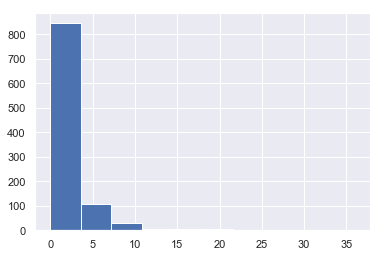

In [62]:
total_lessons = total_lessons_by_account.values()

(data_calculate(total_lessons))

## Number of Visits in First Week

Sum: 2900
Means: 2.908726178535607
Standard Deviation: 2.220243799639186
Min: 0
Max: 7


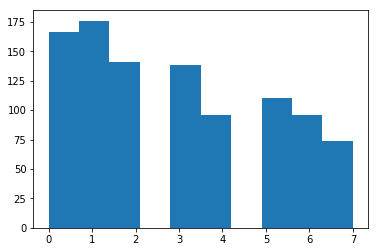

In [42]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
num_days_visited = sum_grp_data(engagement_by_account, 'has_visited')
(data_calculate(num_days_visited.values()))

## Splitting out Passing Students

In [43]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submissions in paid_project_submissions:
    account_key = submissions['lesson_key']
    rating = submissions['assigned_rating']
    if (rating == 'PASSED' or rating == 'DISTINCTION') and (account_key in subway_project_lesson_keys):
        pass_subway_project.add(submissions['account_key'])
print (len(pass_subway_project))       
print (pass_subway_project)

649
{'576', '224', '409', '575', '17', '580', '461', '388', '415', '637', '616', '551', '640', '541', '158', '100', '511', '270', '458', '506', '648', '345', '146', '212', '542', '113', '364', '137', '47', '463', '490', '49', '161', '129', '442', '533', '312', '263', '377', '579', '96', '155', '197', '252', '206', '581', '139', '230', '548', '361', '203', '21', '131', '613', '104', '126', '536', '219', '406', '370', '81', '525', '186', '309', '568', '119', '220', '293', '106', '280', '484', '451', '228', '540', '264', '282', '279', '478', '107', '281', '214', '382', '649', '622', '67', '55', '534', '368', '652', '378', '469', '51', '503', '215', '642', '329', '25', '352', '423', '422', '501', '262', '109', '491', '331', '227', '641', '194', '34', '602', '403', '205', '16', '266', '591', '257', '170', '454', '236', '381', '242', '452', '209', '57', '45', '338', '154', '350', '390', '195', '608', '527', '153', '554', '56', '1', '339', '445', '198', '54', '326', '245', '420', '300', '595'

In [44]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print (len(passing_engagement))
print (passing_engagement[0])
print (passing_engagement[1])
print (passing_engagement[2])

print (len(non_passing_engagement))
print (non_passing_engagement[0])

4542
OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 10, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 37.28488733), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)])
OrderedDict([('account_key', '0'), ('utc_date', datetime.datetime(2015, 1, 11, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 53.63374633), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)])
2392
OrderedDict([('account_key', '653'), ('utc_date', datetime.datetime(2015, 7, 8, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 0)])


## Comparing the Two Student Groups

1.Passing engagement:
Sum: 253317.551163666
Means: 390.31980148484746
Standard Deviation: 439.47301606171743
Min: 0.0
Max: 3564.7332645
2.Non passing engagement
Sum: 50598.97096901601
Means: 145.39934186498854
Standard Deviation: 268.97150372555103
Min: 0.0
Max: 1768.5227493


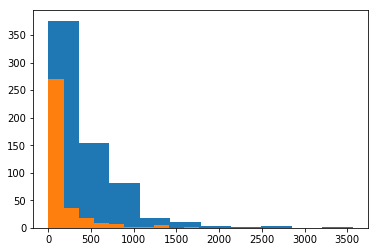

In [45]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
print ('1.Passing engagement:')
passing_engagement_by_account = group_data(passing_engagement, 'account_key')
sum_passing_engagement_by_account = sum_grp_data(passing_engagement_by_account, 'total_minutes_visited')
data_calculate(sum_passing_engagement_by_account.values())

print ('2.Non passing engagement')
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
sum_non_passing_engagement_by_account = sum_grp_data(non_passing_engagement_by_account, 'total_minutes_visited')
data_calculate(sum_non_passing_engagement_by_account.values())

1.Passing engagement:
Sum: 1322
Means: 2.036979969183359
Standard Deviation: 3.140056941751471
Min: 0
Max: 36
2.Non passing engagement
Sum: 302
Means: 0.867816091954023
Standard Deviation: 2.5483370395862583
Min: 0
Max: 27


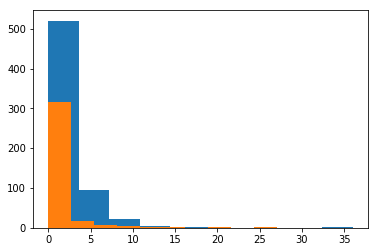

In [46]:
print ('1.Passing engagement:')
sum_passing_engagement_by_account = sum_grp_data(passing_engagement_by_account, 'lessons_completed')
data_calculate(sum_passing_engagement_by_account.values())

print ('2.Non passing engagement')
sum_non_passing_engagement_by_account = sum_grp_data(non_passing_engagement_by_account, 'lessons_completed')
data_calculate(sum_non_passing_engagement_by_account.values())

1.Passing engagement:
Sum: 2221
Means: 3.4221879815100156
Standard Deviation: 2.214367044299962
Min: 0
Max: 7
2.Non passing engagement
Sum: 679
Means: 1.9511494252873562
Standard Deviation: 1.8892995267585324
Min: 0
Max: 7


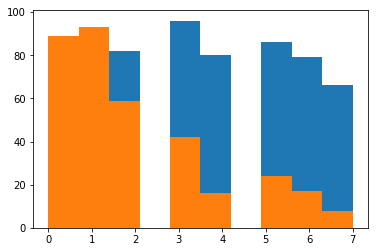

In [47]:
print ('1.Passing engagement:')
sum_passing_engagement_by_account = sum_grp_data(passing_engagement_by_account, 'has_visited')
data_calculate(sum_passing_engagement_by_account.values())

print ('2.Non passing engagement')
sum_non_passing_engagement_by_account = sum_grp_data(non_passing_engagement_by_account, 'has_visited')
data_calculate(sum_non_passing_engagement_by_account.values())

## Making Histograms

In [48]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

## Improving Plots and Sharing Findings

In [ ]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.